In [2]:
!git clone https://github.com/ml-ninja/Data_Driven_Science_Python_Demos.git

Cloning into 'Data_Driven_Science_Python_Demos'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 322 (delta 64), reused 15 (delta 8), pack-reused 180
Receiving objects: 100% (322/322), 230.12 MiB | 23.65 MiB/s, done.
Resolving deltas: 100% (89/89), done.
Checking out files: 100% (121/121), done.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

mat_contents = scipy.io.loadmat(os.path.join('Data_Driven_Science_Python_Demos','DATA','allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1
print(f"trainingFaces.shape: {trainingFaces.shape} / avgFace.shape:  {avgFace.shape} ")

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

trainingFaces.shape: (32256, 2282) / avgFace.shape:  (32256,) 


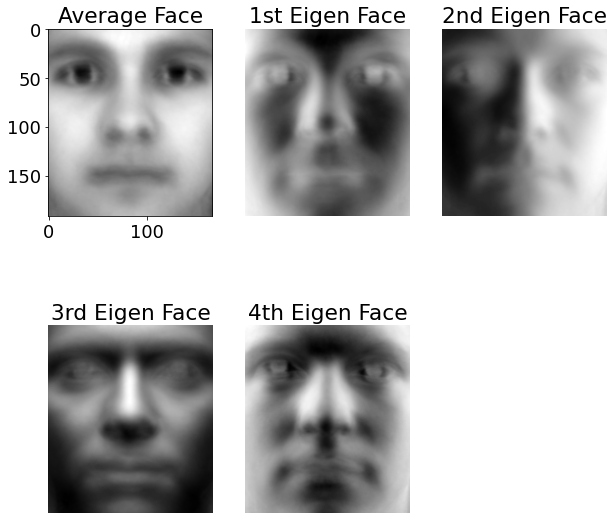

In [21]:

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

fig1 = plt.figure()
ax1 = fig1.add_subplot(231, title='Average Face')
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('on')

ax2 = fig1.add_subplot(232, title='1st Eigen Face')
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

ax3 = fig1.add_subplot(233, title='2nd Eigen Face')
img_u1 = ax3.imshow(np.reshape(U[:,1],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

ax4 = fig1.add_subplot(234, title='3rd Eigen Face')
img_u1 = ax4.imshow(np.reshape(U[:,2],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

ax5 = fig1.add_subplot(235, title='4th Eigen Face')
img_u1 = ax5.imshow(np.reshape(U[:,3],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

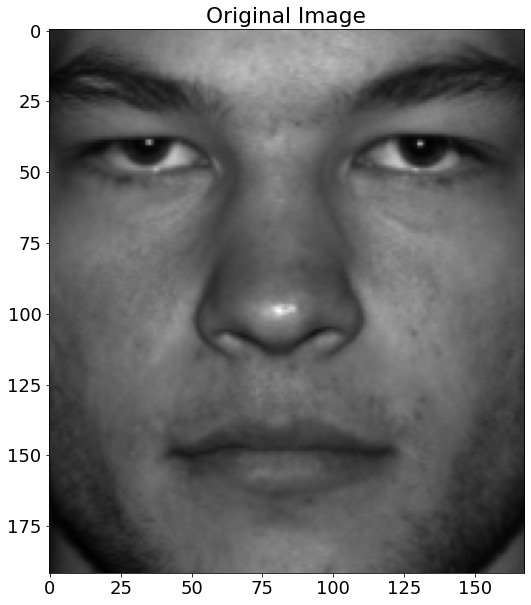

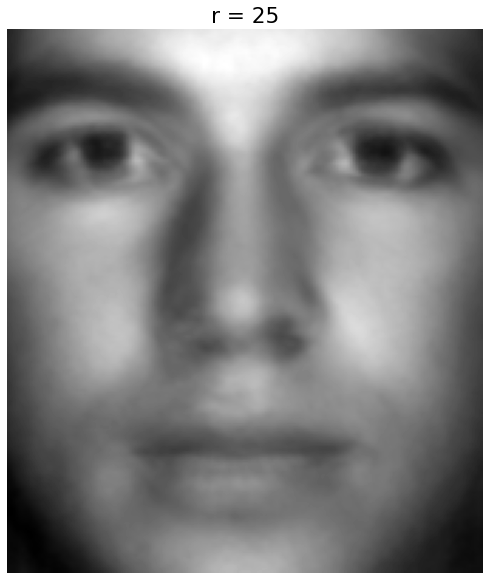

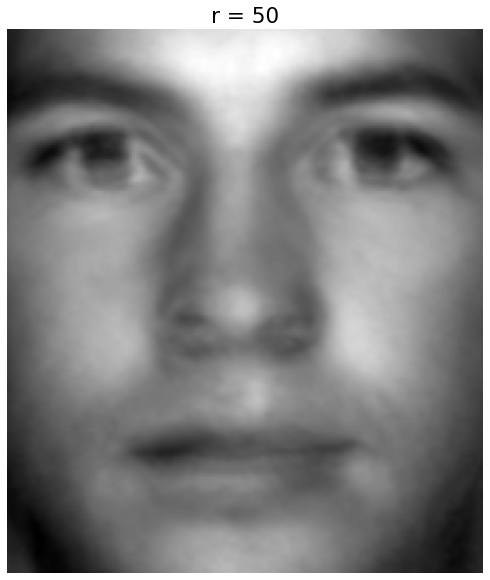

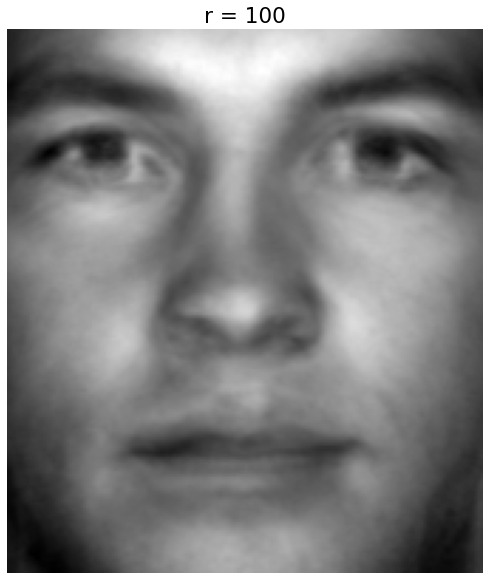

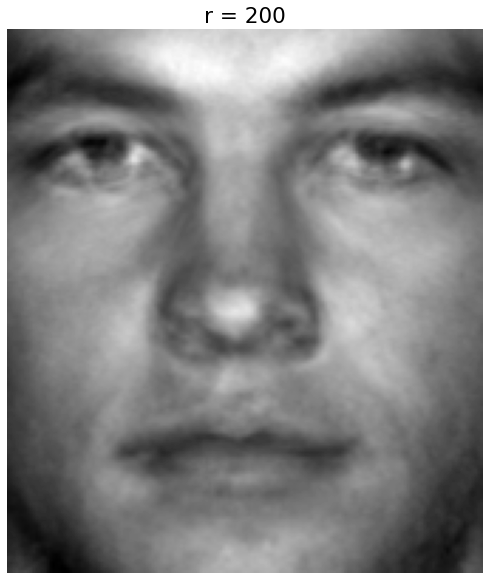

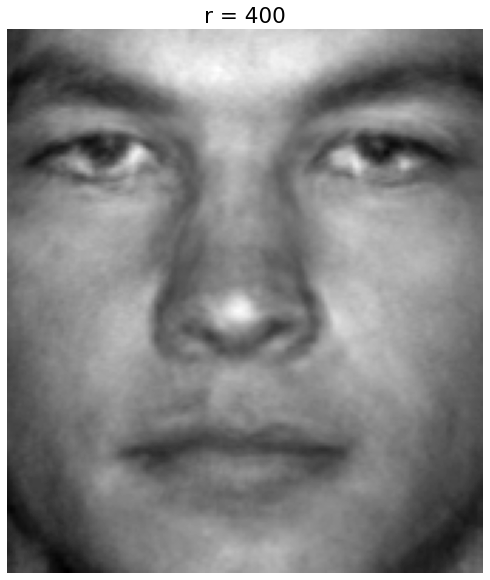

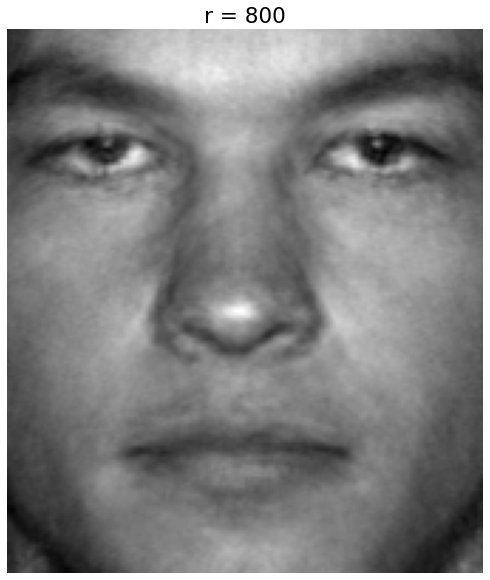

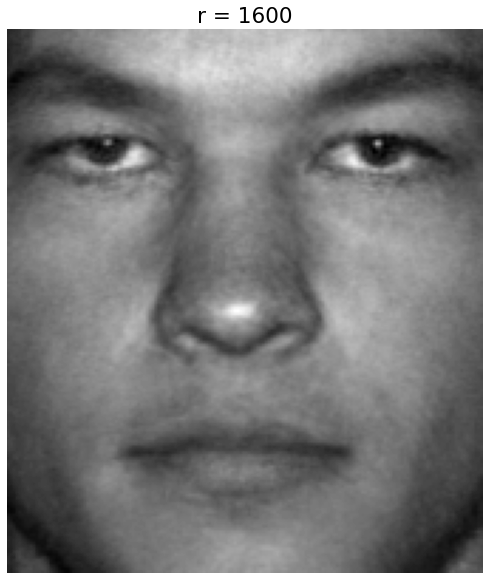

In [22]:
## Now show eigenface reconstruction of image that was omitted from test set

testFace = faces[:,np.sum(nfaces[:36])] # First face of person 37
plt.imshow(np.reshape(testFace,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('on')
plt.show()

testFaceMS = testFace - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]
# r_list = [25, 50, 100]

for r in r_list:
    # it's much more efficient if we compute the cofficients first
    coefficientsInUspace = U[:,:r].T @ testFaceMS
    reconFace = U[:,:r] @ coefficientsInUspace + avgFace

    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

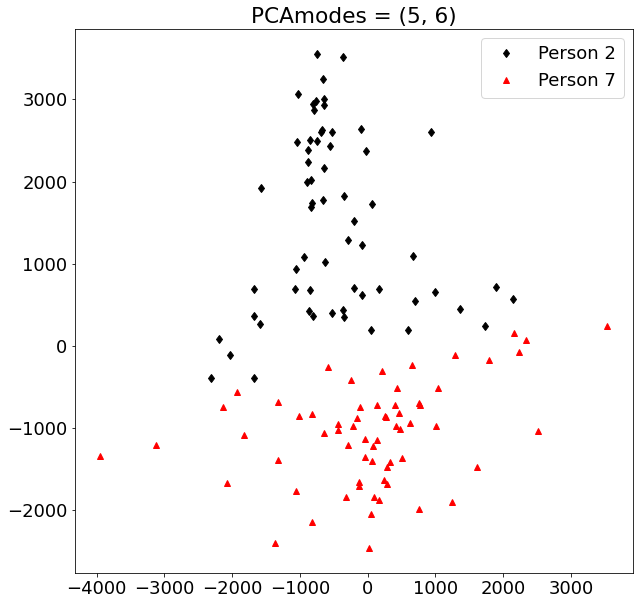

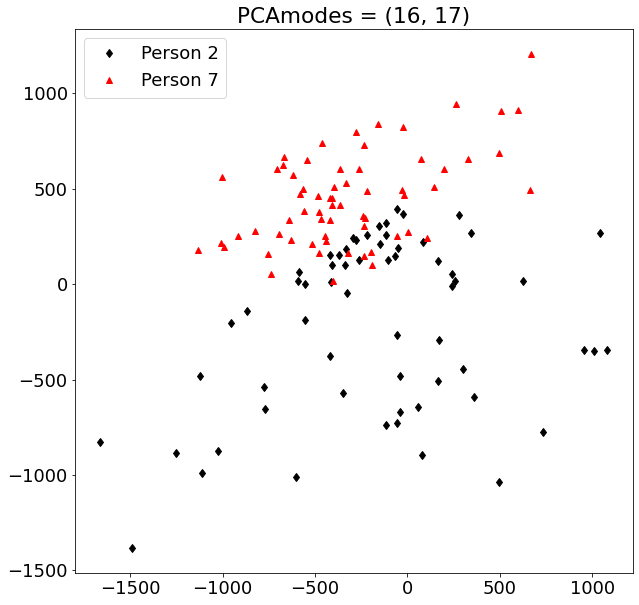

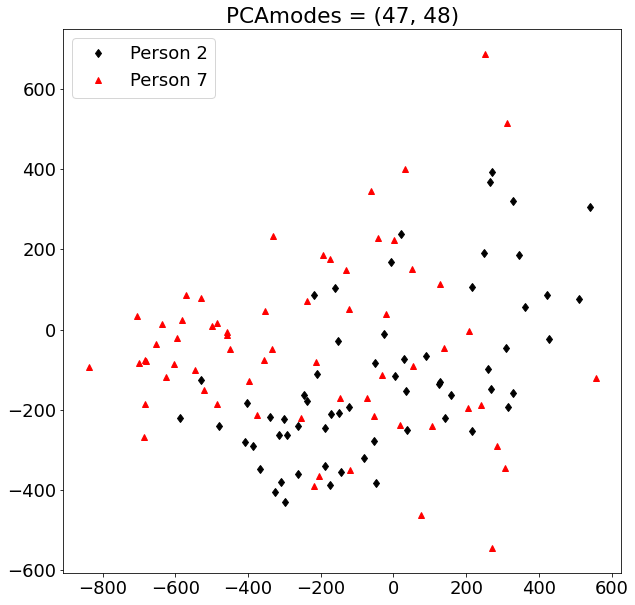

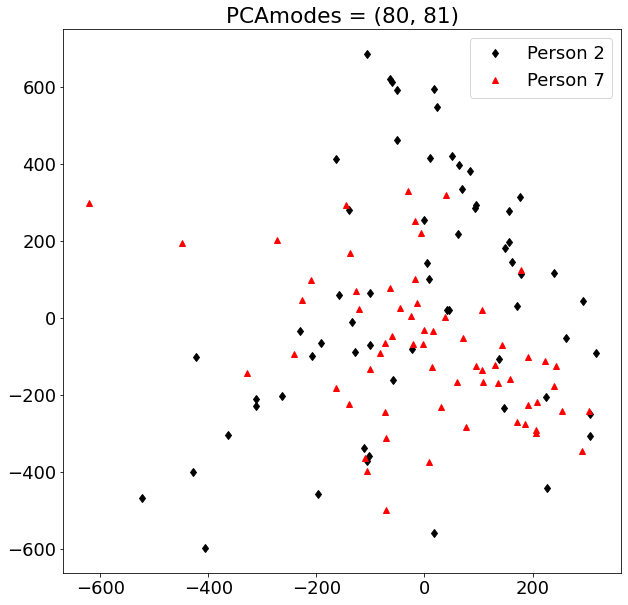

In [29]:
## Project person 2 and 7 onto PC5 and PC6

P1num = 2  
P2num = 7  
P1numLabel = f"Person {P1num}"
P2numLabel = f"Person {P2num}"

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T


for PCAmodes in [(5,6), (16,17), (47,48), (80,81) ]:
  # PCAmodes = [mode, mode+1] 
  PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
  PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

  plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',color='k',label=P1numLabel)
  plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',color='r',label=P2numLabel)
  plt.title(f'PCAmodes = {PCAmodes}')

  plt.legend()
  plt.show()